In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# Load the data set
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston_data['target'].shape

(506,)

In [6]:
boston_data['data'].shape

(506, 13)

In [7]:
boston_data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
# create Pandas DataFrame with data from Boson dataset
df = pd.DataFrame(data = boston_data['data'])
df.columns = boston_data['feature_names']
df['Price'] = boston_data['target'] # add target data to this DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# check the correlation of all other features with target
corr = df.corr()

In [11]:
# pick feature with maximum correlation with target
corr['Price'].sort_values(ascending=False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

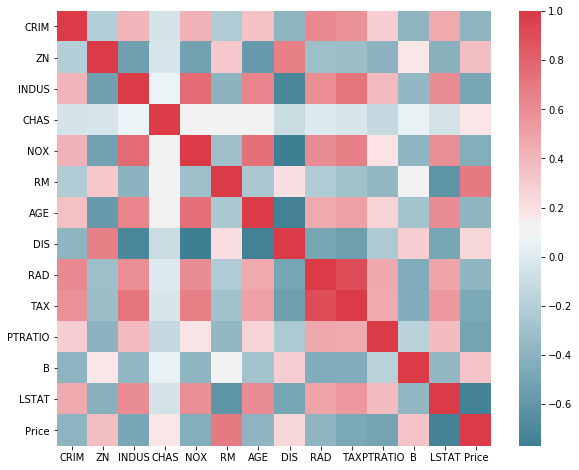

In [12]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()
# The bottom most row show the correlation the square

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

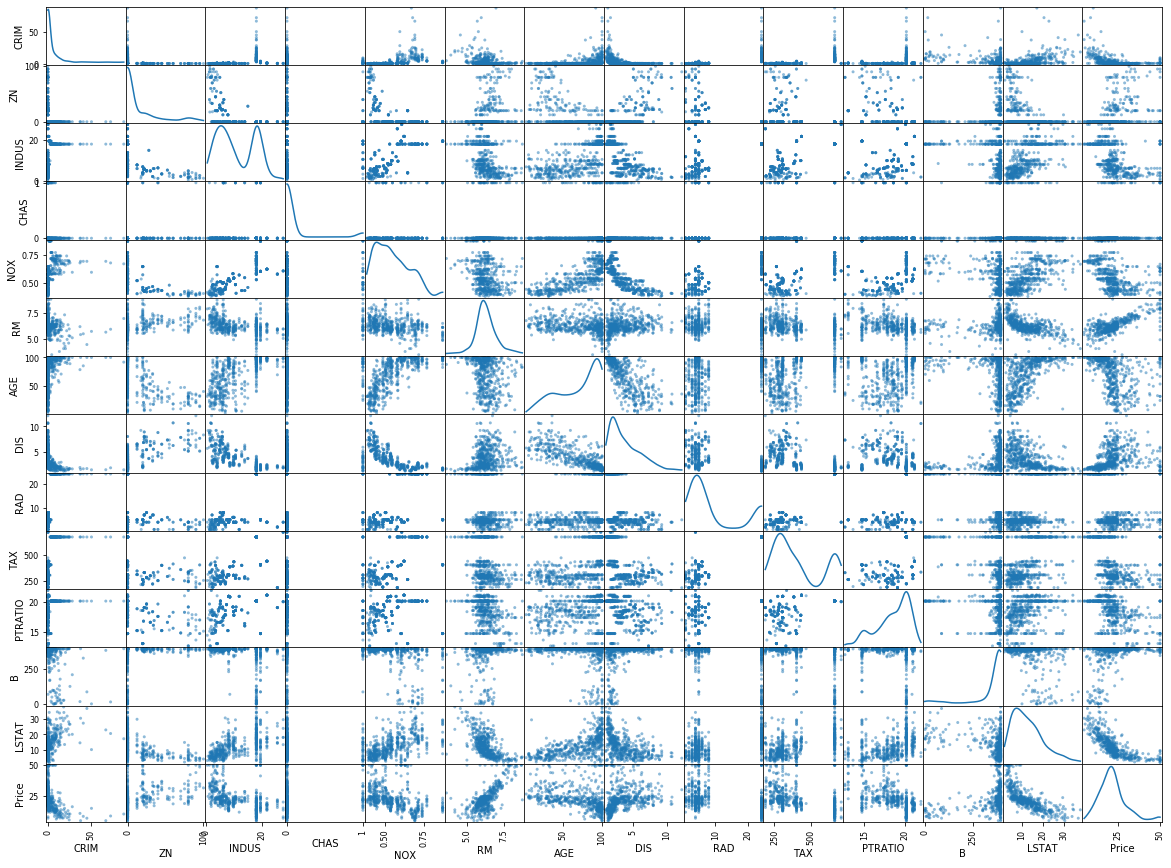

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.5, diagonal='kde')
corr = df.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()
# From the last column we can see only the RM feature has good linear relation with housing price 

In [15]:
# Simple Linear Regression we'll just consider RM and Price features
x = df['RM']
y = df['Price']

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

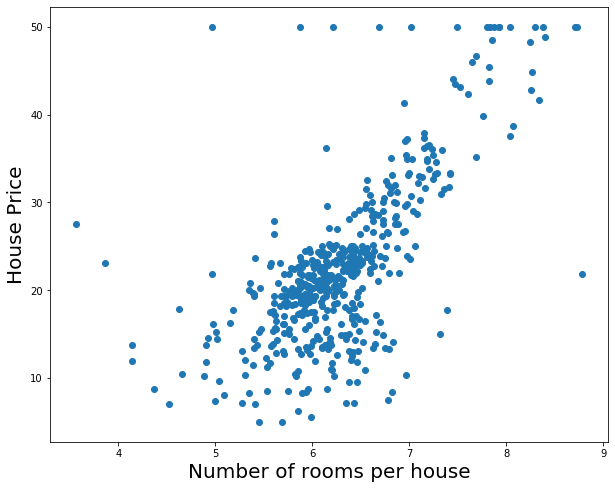

In [17]:
plt.scatter(x,y)
plt.xlabel('Number of rooms per house', size = 20)
plt.ylabel('House Price', size = 20)
plt.show()

In [18]:
# We need to do feature scaling for linear gradient, for better convergence
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

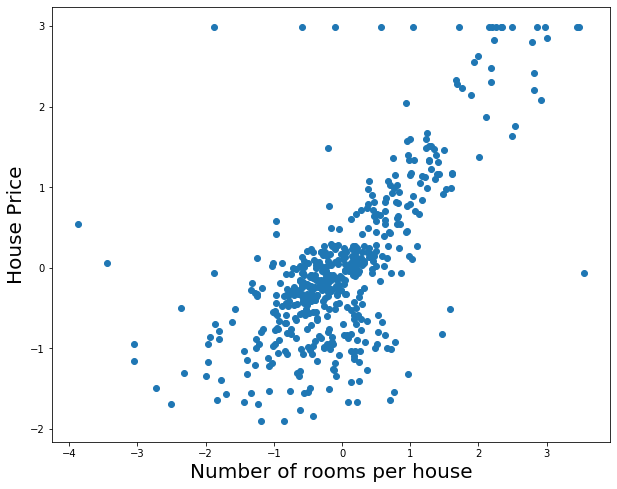

In [19]:
plt.scatter(x,y)
plt.xlabel('Number of rooms per house', size = 20)
plt.ylabel('House Price', size = 20)
plt.show()

In [20]:
x = np.c_[np.ones(x.shape[0]),x]

In [21]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)  
theta = np.random.rand(2)  #initializing theta with some random values

In [22]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = [] #to record all cost values to this list
    theta_list = [] #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10) #we append some large value to the cost list
    i = 0
    while run:
        prediction = np.dot(x,theta)
        prediction_list.append(prediction) #predicted y values theta_0*x0+theta_1*x1
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error) #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T,error)) # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if(cost_list[i] - cost_list[i+1] < 1e-9) : #checking if the change in cost function is less than 10^(-9)
            run = False
        i+=1
    cost_list.pop(0) # Remove the large number we added in the begining 
    return prediction_list,cost_list,theta_list

In [23]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [24]:
print("Values of theta are {:2f} and {:2f}".format(theta[0], theta[1]))

Values of theta are 0.002370 and 0.693263


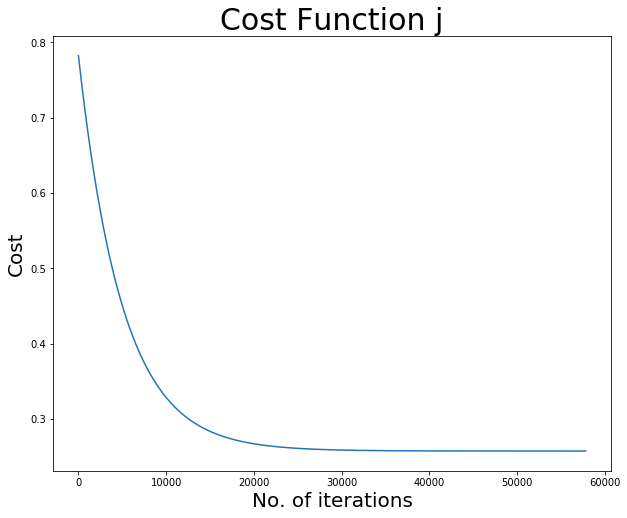

In [25]:
plt.title('Cost Function j',size=30)
plt.xlabel('No. of iterations',size=20)
plt.ylabel('Cost',size=20)
plt.plot(cost_list)
plt.show()

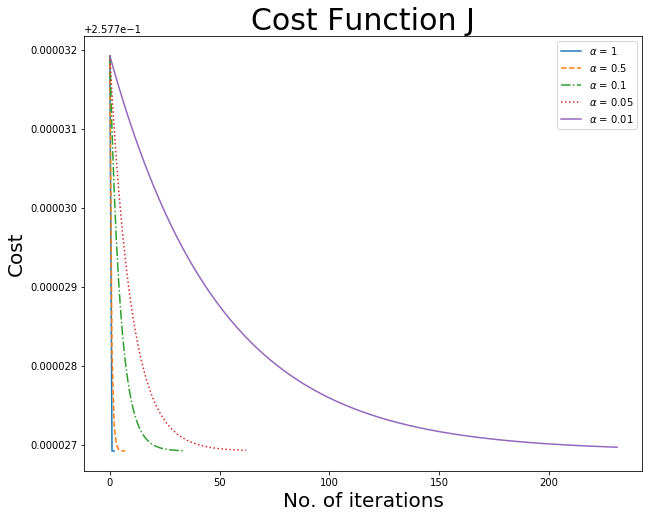

In [26]:
alpha_list = [1,0.5,0.1,0.05,0.01] 
plot_style = ["-","--","-.",":"]
from itertools import cycle
plot_styles = cycle(plot_style)
for i in range(len(alpha_list)):
    prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha_list[i])
    plt.title('Cost Function J', size = 30)
    plt.xlabel('No. of iterations', size=20)
    plt.ylabel('Cost', size=20)
    plt.plot(cost_list,next(plot_styles), label =r'$\alpha$ = {}'.format(alpha_list[i]) )
    plt.legend()
plt.show()